<a href="https://colab.research.google.com/github/Amit-95/Project_showcase/blob/main/Copy_of_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [2]:
#importing the required libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#loading the dataset
file_path = '/content/drive/MyDrive/Almabetter_related_stuff/Data_/Copy of Hotel Bookings.csv'
bookings_df = pd.read_csv(file_path)

In [5]:
bookings_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
bookings_df.shape

(119390, 32)

In [7]:
bookings_df.groupby(['arrival_date_month', 'arrival_date_year']).count()

hotel  is_canceled  lead_time  \
arrival_date_month arrival_date_year                                  
April              2016                5428         5428       5428   
                   2017                5661         5661       5661   
August             2015                3889         3889       3889   
                   2016                5063         5063       5063   
                   2017                4925         4925       4925   
December           2015                2920         2920       2920   
                   2016                3860         3860       3860   
February           2016                3891         3891       3891   
                   2017                4177         4177       4177   
January            2016                2248         2248       2248   
                   2017                3681         3681       3681   
July               2015                2776         2776       2776   
                   2016                4572         4572       4572   
                   2017                5313         5313       5313   
June               2016                5292         5292       5292   
                   2017                5647         5647       5647   
March              2016                4824         4824       4824   
                   2017                4970         4970       4970   
May                2016                5478         5478       5478   
                   2017                6313         6313       6313   
November           2015                2340         2340       2340   
                   2016                4454         4454       4454   
October            2015                4957         4957       4957   
                   2016                6203         6203       6203   
September          2015                5114         5114       5114   
                   2016                5394         5394       5394   

                                      arrival_date_week_number  \
arrival_date_month arrival_date_year                             
April              2016                                   5428   
                   2017                                   5661   
August             2015                                   3889   
                   2016                                   5063   
                   2017                                   4925   
December           2015                                   2920   
                   2016                                   3860   
February           2016                                   3891   
                   2017                                   4177   
January            2016                                   2248   
                   2017                                   3681   
July               2015                                   2776   
                   2016                                   4572   
                   2017                                   5313   
June               2016                                   5292   
                   2017                                   5647   
March              2016                                   4824   
                   2017                                   4970   
May                2016                                   5478   
                   2017                                   6313   
November           2015                                   2340   
                   2016                                   4454   
October            2015                                   4957   
                   2016                                   6203   
September          2015                                   5114   
                   2016                                   5394   

                                      arrival_date_day_of_month  \
arrival_date_month arrival_date_year                              
April              2016                                    5428   

#### July and August have 3 rows compared to other months. 



In [8]:
bookings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [9]:
#checking for missing values
bookings_df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [10]:
bookings_df['children'].fillna(0,inplace=True)
bookings_df['country'].fillna('XYZ',inplace=True)

In [11]:
bookings_df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                                0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

### Removing columns which are not required for analysis and clubbing others.

In [12]:
bookings_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [13]:
selected_columns= ['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'deposit_type', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests']

In [14]:
# Creating a copy so as not to disturb original dataset.
df = bookings_df[selected_columns].copy()

In [15]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.031912,0.087118,0.137097,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.175767,0.844336,1.497437,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,1.000000,26.000000,72.000000,5400.000000,8.000000,5.000000


In [16]:
# dropping babies column as they are not accounted into monetary aspects.
df['Total_Guests'] = df['adults'] + bookings_df['children']

In [17]:
df = df.drop(['adults', 'children'], axis=1)

Removing the outliers by using conditionals to get and update these values.

In [18]:
df.loc[df.lead_time > 500, 'lead_time'] = 500
df.loc[df.stays_in_weekend_nights >=  5, 'stays_in_weekend_nights'] = 5
df.loc[df.previous_bookings_not_canceled > 0, 'previous_bookings_not_canceled'] = 1
df.loc[df.previous_cancellations > 0, 'previous_cancellations'] = 1
df.loc[df.stays_in_week_nights > 10, 'stays_in_week_nights'] = 10
df.loc[df.required_car_parking_spaces > 5, 'required_car_parking_spaces'] = 0

In [19]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,adr,required_car_parking_spaces,total_of_special_requests,Total_Guests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,103.755583,2016.156554,27.165173,15.798241,0.922682,2.479211,0.031912,0.054309,0.030321,101.831122,0.062384,0.571363,1.960290
std,0.482918,105.798008,0.707476,13.605138,8.780829,0.967814,1.761267,0.175767,0.226628,0.171469,50.535790,0.243130,0.792798,0.713053
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000,2.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000,2.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2.000000
max,1.000000,500.000000,2017.000000,53.000000,31.000000,5.000000,10.000000,1.000000,1.000000,1.000000,5400.000000,3.000000,5.000000,55.000000


In [20]:
# removing rows which contain total guests as Zero.
df= df[df.Total_Guests > 0]

In [21]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,...,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,Total_Guests
0,Resort Hotel,0,342,2015,July,27,1,0,0,BB,...,0,0,C,C,No Deposit,Transient,0.0,0,0,2.0
1,Resort Hotel,0,500,2015,July,27,1,0,0,BB,...,0,0,C,C,No Deposit,Transient,0.0,0,0,2.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,BB,...,0,0,A,C,No Deposit,Transient,75.0,0,0,1.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,BB,...,0,0,A,A,No Deposit,Transient,75.0,0,0,1.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,BB,...,0,0,A,A,No Deposit,Transient,98.0,0,1,2.0


### Separating and creating different datasets of both the hotel types.

In [22]:
df.hotel.unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [23]:
# selecting only those rows which have donot have booking cancellations.
df1= df[df.is_canceled == 0]
df1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,...,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,Total_Guests
0,Resort Hotel,0,342,2015,July,27,1,0,0,BB,...,0,0,C,C,No Deposit,Transient,0.0,0,0,2.0
1,Resort Hotel,0,500,2015,July,27,1,0,0,BB,...,0,0,C,C,No Deposit,Transient,0.0,0,0,2.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,BB,...,0,0,A,C,No Deposit,Transient,75.0,0,0,1.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,BB,...,0,0,A,A,No Deposit,Transient,75.0,0,0,1.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,BB,...,0,0,A,A,No Deposit,Transient,98.0,0,1,2.0


In [24]:

sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['figure.facecolor'] = '#00000000'

Text(0.5, 1.0, 'yearly bookings')

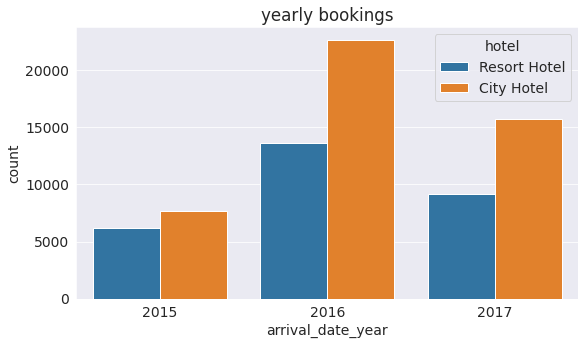

In [25]:
sns.countplot (x= 'arrival_date_year', data= df1, hue= 'hotel').set_title ('yearly bookings')

### Inference: Bookings across years is higher for city hotel compared to resort hotel.

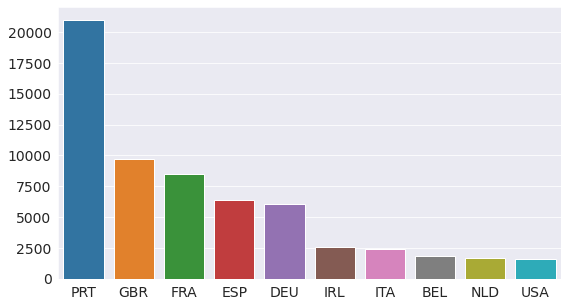

In [26]:
sns.barplot (y= list(df1.country.value_counts().head (10)), x= list(df1.country.value_counts().head(10).index))

#Bookings maximum coming from this countries.(PRT stands as max)

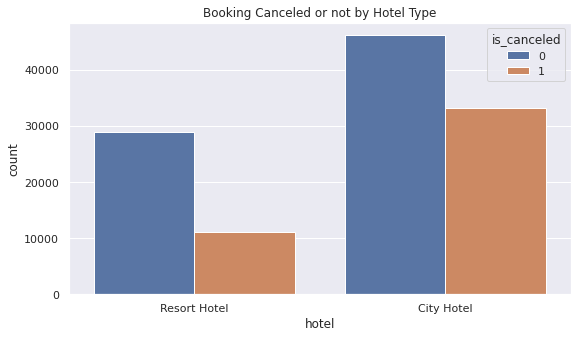

In [27]:
# another way of plotting same graph including hue as cancellation
sns.set(style = "darkgrid")
plt.title("Booking Canceled or not by Hotel Type")
ax = sns.countplot(x = "hotel", hue = 'is_canceled', data = df)

### Inference : Around 40% bookings were cancelled in city hotel and 30% in resort hotel.

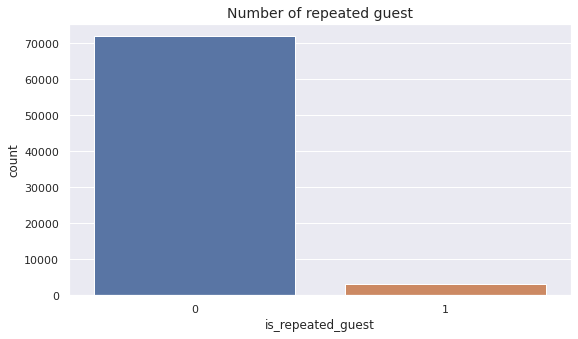

In [28]:
# No. of repeated guests
sns.countplot(data = df1, x = 'is_repeated_guest').set_title('Number of repeated guest', fontsize = 14)
plt.show()

Repeated guests are very less.

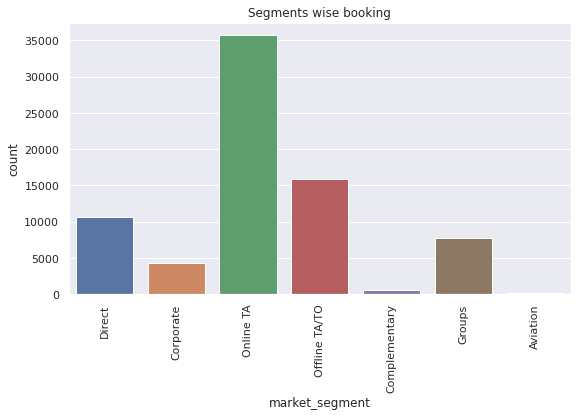

In [29]:
plt.title("Segments wise booking")
ax = sns.countplot(x = "market_segment", data = df1)
plt.xticks(rotation = 90)
plt.show()

### Inference: Indirect bookings through online and offline travel agents are higher compared to direct bookings and same is the case with group bookings which are also high.

In [31]:
a = df.groupby("customer_type")['is_canceled'].describe()
print(a)

,count,mean,std,min,25%,50%,75%,max
customer_type,,,,,,,,
Contract,4072.0,0.309921,0.462518,0.0,0.0,0.0,1.0,1.0
Group,574.0,0.101045,0.301652,0.0,0.0,0.0,0.0,1.0
Transient,89476.0,0.407864,0.491440,0.0,0.0,0.0,1.0,1.0
Transient-Party,25088.0,0.254504,0.435591,0.0,0.0,0.0,1.0,1.0


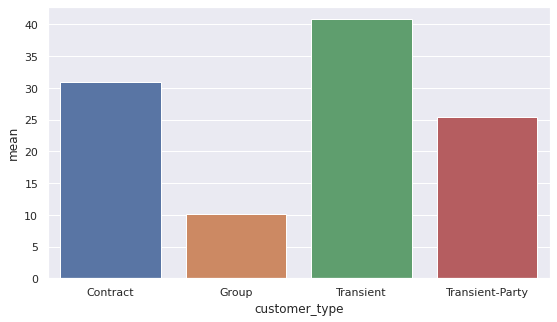

In [40]:
sns.barplot(x=a.index, y=a["mean"]*100)

### Inference: Transient customer types have higher cancellations.

In [35]:
df['is_canceled'].unique()

array([0, 1])

In [36]:
df['lead_time']

0         342
1         500
2           7
3          13
4          14
         ... 
119385     23
119386    102
119387     34
119388    109
119389    205
Name: lead_time, Length: 119210, dtype: int64

In [38]:
b = df.groupby("lead_time")['is_canceled'].describe()
print(b)

            count      mean       std  min  25%  50%  75%  max
lead_time                                                     
0          6264.0  0.066571  0.249297  0.0  0.0  0.0  0.0  1.0
1          3445.0  0.092308  0.289502  0.0  0.0  0.0  0.0  1.0
2          2065.0  0.103148  0.304225  0.0  0.0  0.0  0.0  1.0
3          1815.0  0.100275  0.300450  0.0  0.0  0.0  0.0  1.0
4          1710.0  0.102339  0.303182  0.0  0.0  0.0  0.0  1.0
...           ...       ...       ...  ...  ...  ...  ...  ...
489          17.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
490           9.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
493          10.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
496          17.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
500         481.0  0.856549  0.350897  0.0  1.0  1.0  1.0  1.0

[451 rows x 8 columns]


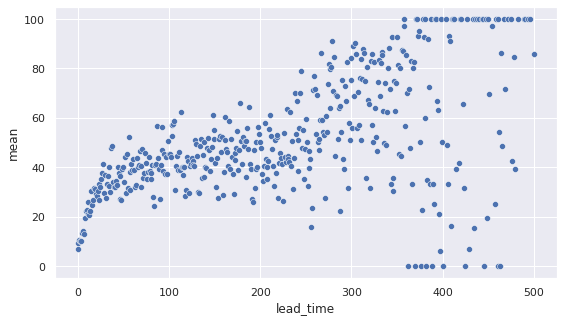

In [41]:
sns.scatterplot(x=b.index, y=b["mean"] * 100)

### Lead time has a positive correlation with cancellation.(which means lead time higher then chances of cancellation is higher) 

In [43]:
df['deposit_type'].nunique()

3

In [44]:
df['deposit_type'].value_counts()

No Deposit    104461
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

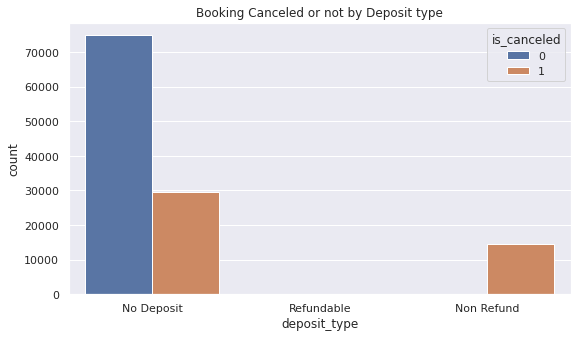

In [45]:
plt.title("Booking Canceled or not by Deposit type")
sns.countplot(x='deposit_type',data=df ,hue='is_canceled')

Around 25% of bookings were cancelled by guests with no deposit. These numbers are huge if the hotels were not able to replace the cancelled bookings in time. Strange that refundable deposit type has very less cancellation compared to non-refundable deposit type.

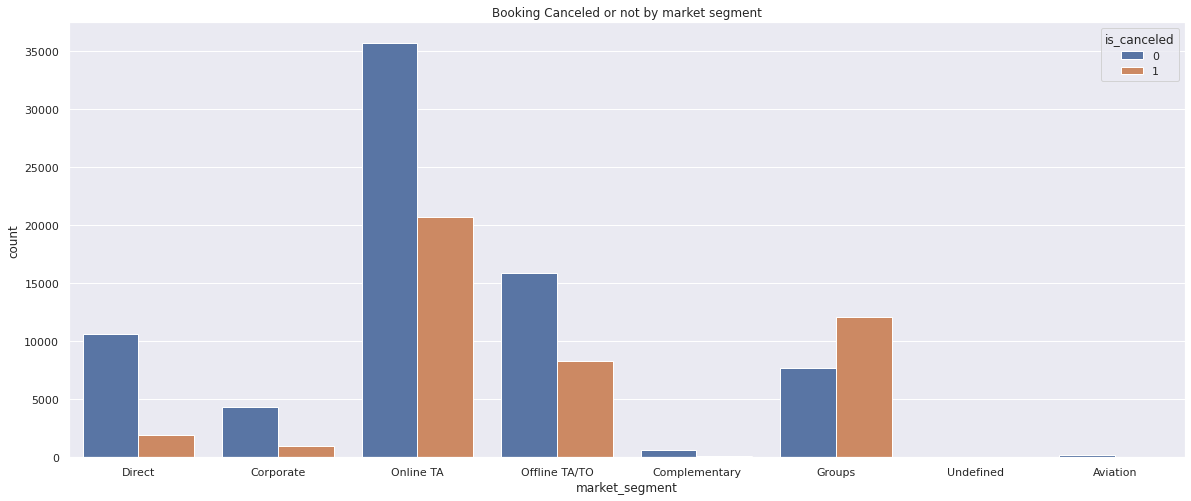

In [51]:
plt.title("Booking Canceled or not by market segment")
sns.countplot(x='market_segment',data=df ,hue='is_canceled')


sns.set(rc = {'figure.figsize':(20,5)})

 It is interesting to note that direct segment has cancellation rate less than 20%.Groups segment has more than 50% cancellation rate.

In [53]:
bookings_df.groupby('previous_cancellations').count()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
previous_cancellations,,,,,,,,,,,,,,,,,,,,,
0,112906,112906,112906,112906,112906,112906,112906,112906,112906,112906,...,112906,97483,6110,112906,112906,112906,112906,112906,112906,112906
1,6051,6051,6051,6051,6051,6051,6051,6051,6051,6051,...,6051,5396,506,6051,6051,6051,6051,6051,6051,6051
2,116,116,116,116,116,116,116,116,116,116,...,116,36,71,116,116,116,116,116,116,116
3,65,65,65,65,65,65,65,65,65,65,...,65,9,50,65,65,65,65,65,65,65
4,31,31,31,31,31,31,31,31,31,31,...,31,0,26,31,31,31,31,31,31,31
5,19,19,19,19,19,19,19,19,19,19,...,19,1,18,19,19,19,19,19,19,19
6,22,22,22,22,22,22,22,22,22,22,...,22,6,16,22,22,22,22,22,22,22
11,35,35,35,35,35,35,35,35,35,35,...,35,25,0,35,35,35,35,35,35,35
13,12,12,12,12,12,12,12,12,12,12,...,12,4,0,12,12,12,12,12,12,12


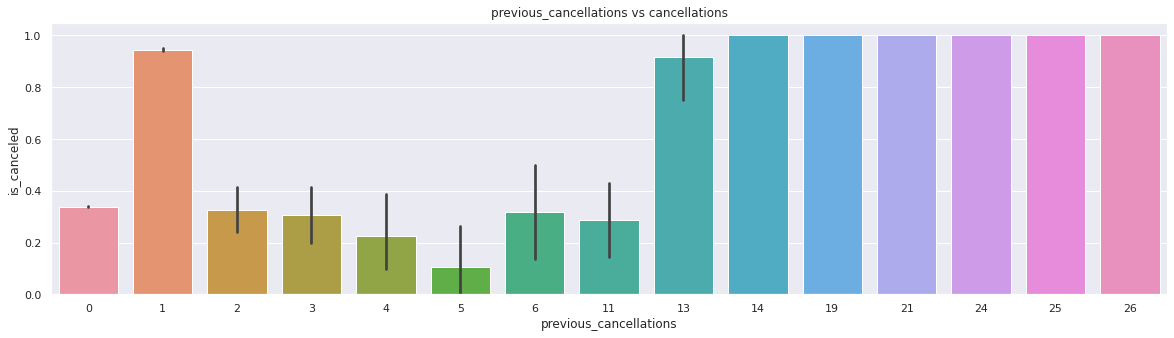

In [54]:
plt.title ('previous_cancellations vs cancellations')
sns.barplot(x= 'previous_cancellations' ,y = "is_canceled", data = bookings_df)

### Those who have cancelled previously once have high chance of cancellation compared to 0 previous cancellations. 

In [56]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,...,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,Total_Guests
0,Resort Hotel,0,342,2015,July,27,1,0,0,BB,...,0,0,C,C,No Deposit,Transient,0.0,0,0,2.0
1,Resort Hotel,0,500,2015,July,27,1,0,0,BB,...,0,0,C,C,No Deposit,Transient,0.0,0,0,2.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,BB,...,0,0,A,C,No Deposit,Transient,75.0,0,0,1.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,BB,...,0,0,A,A,No Deposit,Transient,75.0,0,0,1.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,BB,...,0,0,A,A,No Deposit,Transient,98.0,0,1,2.0


In [59]:
df['adr_pp']= df.adr/df.Total_Guests

In [60]:
monthlyadr_df= df.groupby (['hotel','arrival_date_month'])['adr_pp'].mean()
monthlyadr_df

hotel         arrival_date_month
City Hotel    April                 58.714542
              August                55.300998
              December              48.578168
              February              49.172672
              January               50.800087
              July                  54.834401
              June                  67.899081
              March                 52.362169
              May                   71.068304
              November              56.982024
              October               59.307162
              September             63.089672
Resort Hotel  April                 42.842156
              August                85.492672
              December              37.352314
              February              30.441039
              January               31.031934
              July                  71.996715
              June                  55.704143
              March                 33.615820
              May                   42.200656
 

In [61]:
monthlyadr_df=pd.DataFrame({"hotel":(map(lambda x:x[0],monthlyadr_df.index)), "month": list(map(lambda x:x[1],monthlyadr_df.index)), "mean": monthlyadr_df.values})
monthlyadr_df

,hotel,month,mean
0,City Hotel,April,58.714542
1,City Hotel,August,55.300998
2,City Hotel,December,48.578168
3,City Hotel,February,49.172672
4,City Hotel,January,50.800087
5,City Hotel,July,54.834401
6,City Hotel,June,67.899081
7,City Hotel,March,52.362169
8,City Hotel,May,71.068304
9,City Hotel,November,56.982024


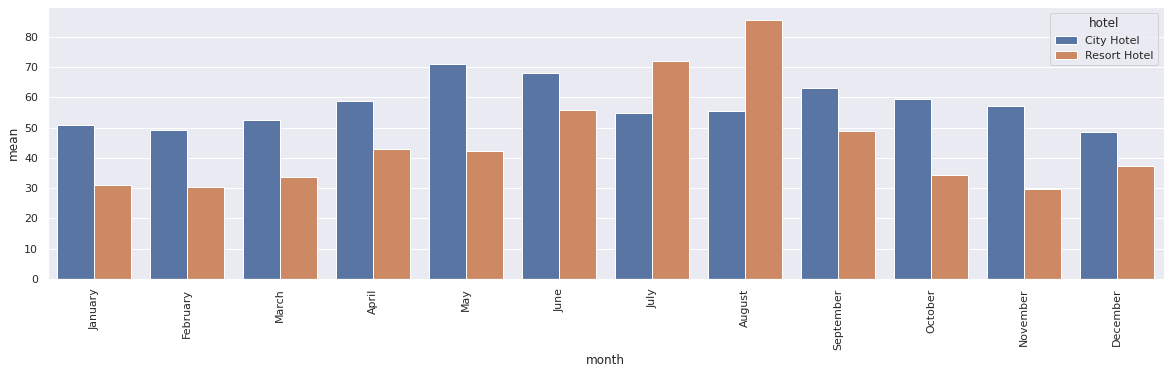

In [62]:
month_sorted = ['January','February','March','April','May','June','July','August','September','October','November','December']
sns.barplot (y= 'mean', x= 'month', data= monthlyadr_df, hue= 'hotel', order= month_sorted)
plt.xticks(rotation = 90)
plt.show()

This shows that prices in the Resort Hotel are higher during the summer and prices of city hotel varies less and is expensive during other months.

In [64]:
df['reserved_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'B'], dtype=object)

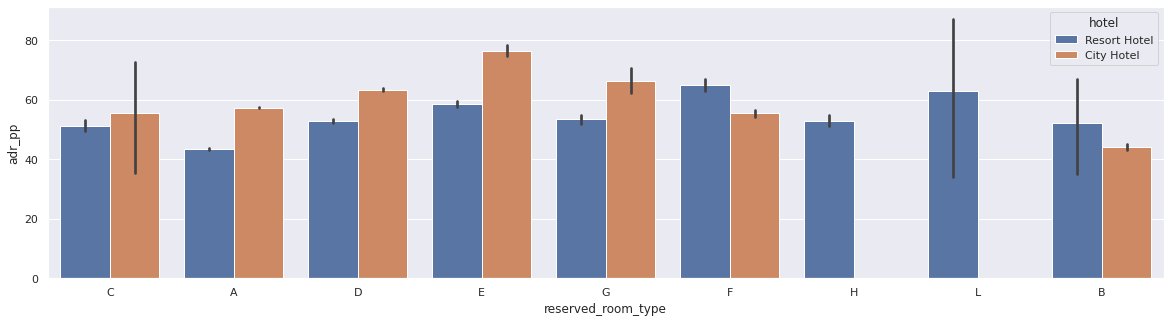

In [65]:
# plotting variation in adr with room type
sns.barplot(data = df, x = 'reserved_room_type', y = 'adr_pp', hue = 'hotel')

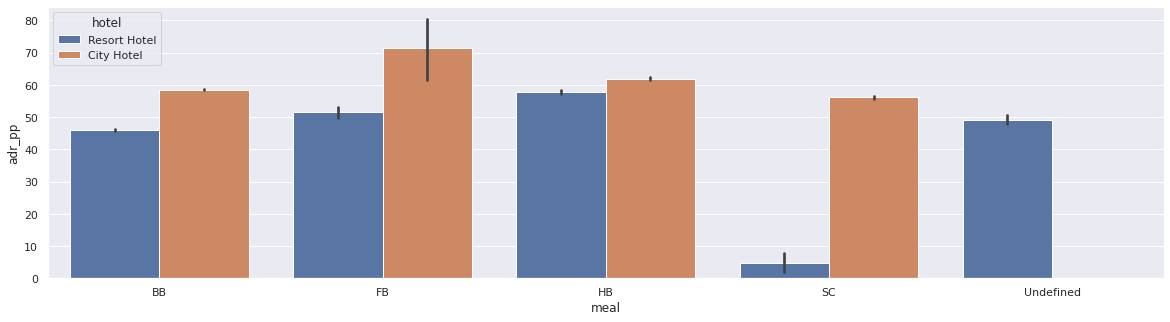

In [66]:
# plotting variation in adr with meal type
sns.barplot(data = df, x = 'meal', y = 'adr_pp', hue = 'hotel')